### What is Train/Test Split?

When we build a machine learning model, we want to check if it really works on new, unseen data.
If we train and test on the same data, the model will just memorize instead of learning.

👉 Solution: split the dataset into two parts:

Training set – Used to teach the model (like practice).

Test set – Used to check how well the model performs on unseen data (like the final exam).
Analogy 🎓

Think of preparing for an exam:

Training set = practice questions you solve while studying.

Test set = actual exam questions you haven’t seen before.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Titanic dataset (from seaborn or CSV)
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Keep only useful columns
data = titanic[['age', 'sex', 'pclass', 'survived']].dropna()

# Convert categorical to numeric
data['sex'] = data['sex'].map({'male': 0, 'female': 1})

# Features (X) and target (y)
X = data[['age', 'sex', 'pclass']]
y = data['survived']

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy on test set:", accuracy_score(y_test, y_pred))


Accuracy on test set: 0.7482517482517482


### Topic 2: Cross-validation (k-fold)
In train/test split, the accuracy depends on how the data was split.

If by chance test set is “easy”, accuracy will look high.

If test set is “hard”, accuracy will look low.

👉 So, the model’s performance may not be reliable from a single split.

🔹 Solution: Cross-validation (k-fold)

Instead of splitting once, we split the dataset into k equal parts (folds):

Pick 1 fold as test set, use the other k-1 folds for training.

Train + test the model.

Repeat this process k times, each time with a different fold as test set.

Average all results → get a more stable estimate of model accuracy.

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Keep useful columns and clean data
data = titanic[['age', 'sex', 'pclass', 'survived']].dropna()
data['sex'] = data['sex'].map({'male': 0, 'female': 1})

# Features and target
X = data[['age', 'sex', 'pclass']]
y = data['survived']

# Logistic Regression model
model = LogisticRegression(max_iter=200)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

print("Scores for each fold:", scores)
print("Average accuracy:", scores.mean())


Scores for each fold: [0.76923077 0.83216783 0.77622378 0.74825175 0.8028169 ]
Average accuracy: 0.7857382054565154


In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
titanic = sns.load_dataset('titanic')
data = titanic[['age','sex','pclass','survived']].dropna()
data['sex'] = data['sex'].map({'male':0 ,'female':1})
X = data[['age','sex','pclass']]
y = data['survived']
model = LogisticRegression(max_iter=200)
scores = cross_val_score(model,X,y,cv = 5)
print(scores)
print(scores.mean())

[0.76923077 0.83216783 0.77622378 0.74825175 0.8028169 ]
0.7857382054565154


### * Bias-variance trade-off}
In Very Simple Terms

Bias = being too simple, ignoring important details → underfitting.

Variance = being too complicated, memorizing noise → overfitting.

We want a balance → not too simple, not too complex.

🔹 Practical Example (Non-ML)

Imagine you are predicting house prices.

High Bias (Underfitting)

Rule: “Every house costs ₹50 lakh.”

✅ Easy rule, simple.

❌ Very inaccurate because houses differ by location, size, etc.

High Variance (Overfitting)

Rule: “This exact house costs ₹52,37,581 because in 2018, one buyer paid that exact amount.”

✅ Perfect for that house.

❌ Useless for other houses → too specific, memorized noise.

Balanced Model (Good Trade-off)

Rule: “House price = ₹20,000 × area + ₹5 lakh if in city center.”

✅ Captures real patterns.

✅ Works well on new houses too.

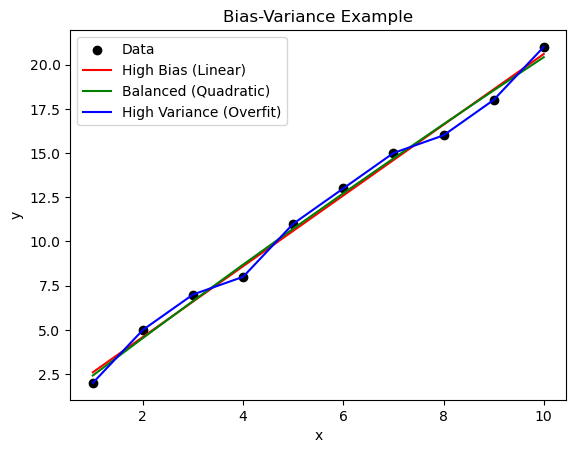

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create a small dataset (x = 1..10, y roughly quadratic)
x = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y = np.array([2, 5, 7, 8, 11, 13, 15, 16, 18, 21])

# Plot the real data
plt.scatter(x, y, color='black', label='Data')

# 1. High Bias (underfitting) → linear fit
model1 = LinearRegression()
model1.fit(x, y)
plt.plot(x, model1.predict(x), color='red', label='High Bias (Linear)')

# 2. Balanced Model → quadratic fit
poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly2, y)
plt.plot(x, model2.predict(x_poly2), color='green', label='Balanced (Quadratic)')

# 3. High Variance (overfitting) → 9th degree polynomial
poly9 = PolynomialFeatures(degree=9)
x_poly9 = poly9.fit_transform(x)
model3 = LinearRegression()
model3.fit(x_poly9, y)
plt.plot(x, model3.predict(x_poly9), color='blue', label='High Variance (Overfit)')

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Bias-Variance Example")
plt.show()


In [17]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dataset
x = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y = np.array([2, 5, 7, 8, 11, 13, 15, 16, 18, 21])

# Split into training (first 7) and test (last 3) for demonstration
x_train, y_train = x[:7], y[:7]
x_test, y_test = x[7:], y[7:]

# 1. High Bias (Linear)
model1 = LinearRegression()
model1.fit(x_train, y_train)
train_pred1 = model1.predict(x_train)
test_pred1 = model1.predict(x_test)
mse_train1 = mean_squared_error(y_train, train_pred1)
mse_test1 = mean_squared_error(y_test, test_pred1)

# 2. Balanced (Quadratic)
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)
model2 = LinearRegression()
model2.fit(x_train_poly2, y_train)
train_pred2 = model2.predict(x_train_poly2)
test_pred2 = model2.predict(x_test_poly2)
mse_train2 = mean_squared_error(y_train, train_pred2)
mse_test2 = mean_squared_error(y_test, test_pred2)

# 3. High Variance (9th degree)
poly9 = PolynomialFeatures(degree=9)
x_train_poly9 = poly9.fit_transform(x_train)
x_test_poly9 = poly9.transform(x_test)
model3 = LinearRegression()
model3.fit(x_train_poly9, y_train)
train_pred3 = model3.predict(x_train_poly9)
test_pred3 = model3.predict(x_test_poly9)
mse_train3 = mean_squared_error(y_train, train_pred3)
mse_test3 = mean_squared_error(y_test, test_pred3)

# Display results
print("Model\t\tTrain MSE\tTest MSE")
print(f"Linear\t\t{mse_train1:.2f}\t\t{mse_test1:.2f}")
print(f"Quadratic\t{mse_train2:.2f}\t\t{mse_test2:.2f}")
print(f"9th Degree\t{mse_train3:.2f}\t\t{mse_test3:.2f}")


Model		Train MSE	Test MSE
Linear		0.16		1.00
Quadratic	0.16		0.67
9th Degree	0.00		4277565.83
